## Zalando fashion-MNIST

The Fashion-MNIST dataset consists of thousands of grey-valued images of clothes from 10 different classes:
0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'.

The training set and test set are provided.

Train a neural network that achieves the highest accuracy possible on the test set.
One option is to use the raw pixel data as input to the neural network. Another approach is first reduce the dimensionaly of the dataset by applying Principle Component Analysis (PCA). 

Visualize some misclassified images. Can you explain why they have been misclassified?

Compare your own result with the ones on https://github.com/zalandoresearch/fashion-mnist.


In [100]:
# Datasets
df_zalando_train = pd.read_csv('./fashion-mnist_train.csv')
df_zalando_test = pd.read_csv('./fashion-mnist_test.csv')
df_zalando_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
# Solution
#df_zalando_train 
X_train = df_zalando_train.iloc[:, 1:].values / 255.0  # Normalize pixel values to [0, 1]
y_train = df_zalando_train.iloc[:, 0].values
X_test = df_zalando_test.iloc[:, 1:].values / 255.0
y_test = df_zalando_test.iloc[:, 0].values

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [120]:
# Data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Step 2: Build a neural network
model = tf.keras.Sequential([
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer with 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 3: Train the model with data augmentation
batch_size = 256 + 256
epochs = 50

history = model.fit(datagen.flow(X_train.reshape(-1, 28, 28, 1), y_train, batch_size=batch_size),
                    steps_per_epoch=len(X_train) // batch_size,
                    epochs=epochs,
                    validation_data=(X_test.reshape(-1, 28, 28, 1), y_test),
                    verbose=2)

Epoch 1/50
117/117 - 6s - loss: 1.0001 - accuracy: 0.6373 - val_loss: 0.6008 - val_accuracy: 0.7671
Epoch 2/50
117/117 - 5s - loss: 0.6564 - accuracy: 0.7510 - val_loss: 0.4974 - val_accuracy: 0.8039
Epoch 3/50
117/117 - 5s - loss: 0.5811 - accuracy: 0.7797 - val_loss: 0.4629 - val_accuracy: 0.8271
Epoch 4/50
117/117 - 5s - loss: 0.5326 - accuracy: 0.8010 - val_loss: 0.4105 - val_accuracy: 0.8467
Epoch 5/50
117/117 - 5s - loss: 0.5039 - accuracy: 0.8094 - val_loss: 0.3986 - val_accuracy: 0.8498
Epoch 6/50
117/117 - 5s - loss: 0.4787 - accuracy: 0.8213 - val_loss: 0.3686 - val_accuracy: 0.8615
Epoch 7/50
117/117 - 5s - loss: 0.4555 - accuracy: 0.8314 - val_loss: 0.3599 - val_accuracy: 0.8666
Epoch 8/50
117/117 - 5s - loss: 0.4408 - accuracy: 0.8353 - val_loss: 0.3383 - val_accuracy: 0.8721
Epoch 9/50
117/117 - 5s - loss: 0.4247 - accuracy: 0.8419 - val_loss: 0.3306 - val_accuracy: 0.8756
Epoch 10/50
117/117 - 5s - loss: 0.4189 - accuracy: 0.8437 - val_loss: 0.3555 - val_accuracy: 0.8635

In [121]:
# Step 4: Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1, 28, 28, 1), y_test, verbose=2)
print(f'Test accuracy: {test_accuracy*100:.2f}%')


313/313 - 0s - loss: 0.2201 - accuracy: 0.9183
Test accuracy: 91.83%


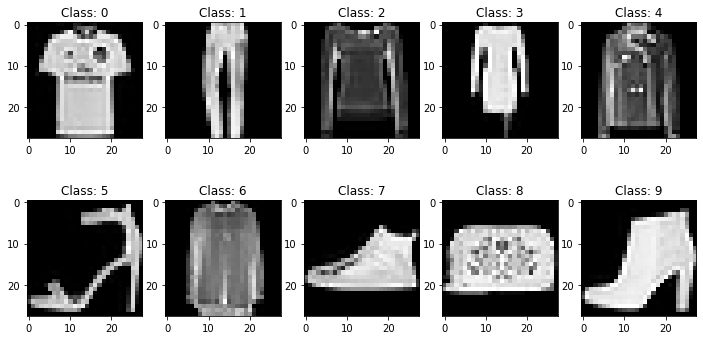

In [122]:
#print an image of each class
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[y_test == i][0].reshape(28, 28), cmap='gray')
    plt.title(f'Class: {i}')
   
plt.show()
 

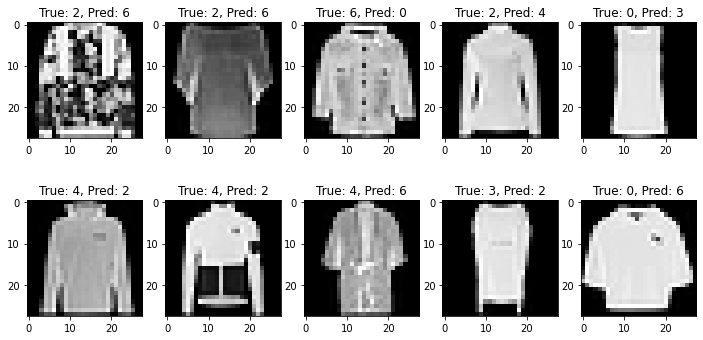

In [123]:
# Visualize some misclassified images
y_pred = model.predict(X_test.reshape(-1, 28, 28, 1))
y_pred_classes = np.argmax(y_pred, axis=1)

misclassified_indices = np.where(y_pred_classes != y_test)[0]

# Visualize some misclassified images
plt.figure(figsize=(12, 6))
for i, idx in enumerate(misclassified_indices[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_test[idx]}, Pred: {y_pred_classes[idx]}')

plt.show()



Confusion Matrix:
[[855   1  14  17   1   0 104   1   7   0]
 [  1 992   0   6   0   0   1   0   0   0]
 [ 15   0 861   6  47   0  68   0   3   0]
 [  7   5   4 949  16   0  19   0   0   0]
 [  0   2  38  24 867   0  66   0   3   0]
 [  0   0   0   0   0 977   0  20   0   3]
 [102   0  53  28  54   0 757   0   6   0]
 [  0   0   0   0   0  10   0 964   0  26]
 [  0   0   1   0   2   1   1   2 993   0]
 [  0   0   0   0   0   2   0  30   0 968]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1000
           1       0.99      0.99      0.99      1000
           2       0.89      0.86      0.87      1000
           3       0.92      0.95      0.93      1000
           4       0.88      0.87      0.87      1000
           5       0.99      0.98      0.98      1000
           6       0.75      0.76      0.75      1000
           7       0.95      0.96      0.96      1000
           8       0.98      0.99      0.

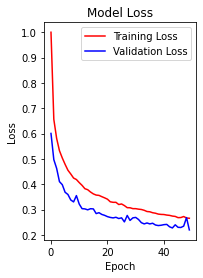

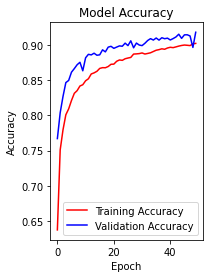

In [130]:
# Additional analysis: Confusion matrix and classification report
confusion = confusion_matrix(y_test, y_pred_classes)
print('Confusion Matrix:')
print(confusion)

classification_rep = classification_report(y_test, y_pred_classes)
print('Classification Report:')
print(classification_rep)

# Plot accuracy and loss
# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], 'r', label='Training Loss')
plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], 'r', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()
